## 随机 filter 

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

class myConvModel(keras.Model):
    def __init__(self):
        super(myConvModel, self).__init__()
        self.l1_conv = Conv2D(filters=3, kernel_size=(3, 3), padding='same')
        
    @tf.function
    def call(self, x):
        h1 = self.l1_conv(x)
        return h1



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



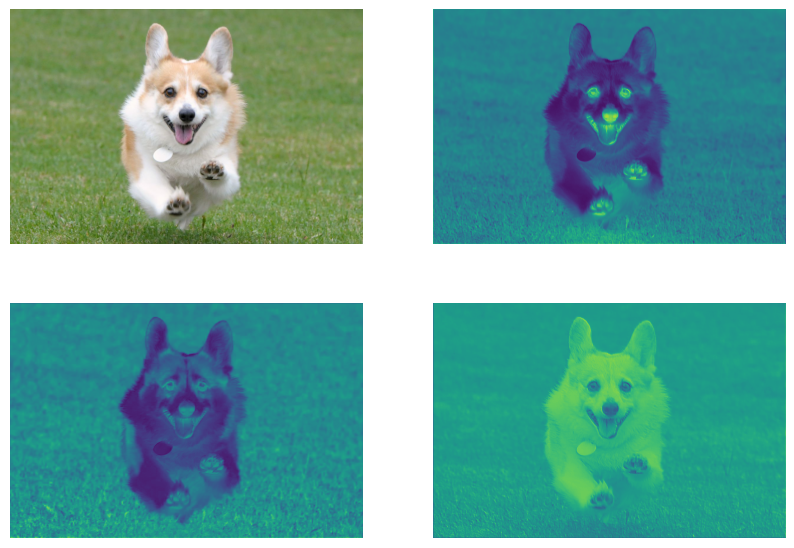

In [2]:
random_conv = myConvModel()
import numpy
import pylab
from PIL import Image
import numpy as np

# open random image of dimensions 639x516
img = Image.open(open('corgi.jpg', 'rb'))
img = numpy.asarray(img, dtype='float64') / 256.
img = np.expand_dims(img, axis=0)
img_out = random_conv(img)

pylab.figure(figsize=(10,7))
pylab.subplot(2, 2, 1); pylab.axis('off'); pylab.imshow(img[0, :, :, :])
pylab.subplot(2, 2, 2); pylab.axis('off'); pylab.imshow(img_out[0, :, :, 0])
pylab.subplot(2, 2, 3); pylab.axis('off'); pylab.imshow(img_out[0, :, :, 1])
pylab.subplot(2, 2, 4); pylab.axis('off'); pylab.imshow(img_out[0, :, :, 2])
pylab.show()
